# Simulation plots (interactive)

This notebook loads the CSV outputs and lets you explore plots freely.

In [5]:
import matplotlib as mpl
mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
    "text.color": "black",
    "axes.labelcolor": "black",
    "axes.edgecolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
})

In [6]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
import pandas as pd

def find_repo_root(start: Path) -> Path:
    for parent in [start, *start.parents]:
        if (parent / "pyproject.toml").exists():
            return parent
    return start

root = find_repo_root(Path.cwd())
outdir = root / "data" / "sim"
trials_path = outdir / "sim_trials.csv"
subjects_path = outdir / "sim_subjects.csv"

if not trials_path.exists() or not subjects_path.exists():
    raise FileNotFoundError(
        f"Missing simulation CSVs in {outdir}. Run: uv run ./scripts/run_sim.py"
    )

trials = pd.read_csv(trials_path)
subjects = pd.read_csv(subjects_path)

trials.head()

,subject,trial,error,state,kalman_gain,state_var,r_post1,delta_pi,r_measure,model,beta,lam,plateau_b
0,0,1,-11.971876,-5.873359,0.490596,0.509455,1.038439,-0.436435,1.038439,M0,0.0,0.0,0.0
1,0,2,-6.361261,-7.967301,0.329171,0.341824,1.038439,-0.436435,1.038439,M0,0.0,0.0,0.0
2,0,3,-3.480084,-8.829338,0.247706,0.257227,1.038439,-0.436435,1.038439,M0,0.0,0.0,0.0
3,0,4,-3.163765,-9.457633,0.198591,0.206225,1.038439,-0.436435,1.038439,M0,0.0,0.0,0.0
4,0,5,-3.188235,-9.986095,0.165754,0.172125,1.038439,-0.436435,1.038439,M0,0.0,0.0,0.0


## Mean trajectory with SEM

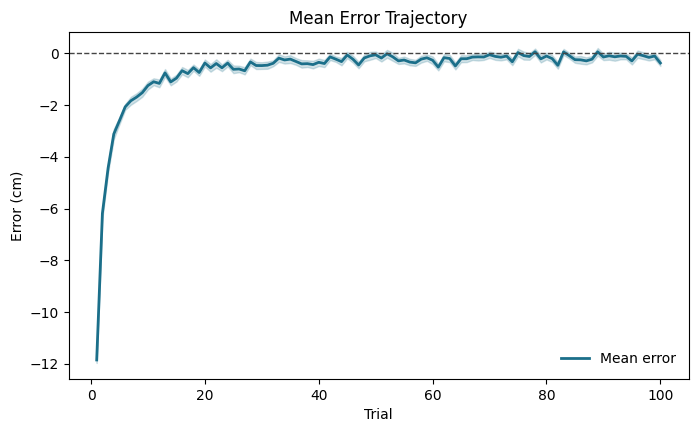

In [7]:
grouped = trials.groupby("trial")["error"]
mean = grouped.mean()
sem = grouped.sem()

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(mean.index, mean.values, color="#1b6f8a", lw=2, label="Mean error")
ax.fill_between(mean.index, mean - sem, mean + sem, color="#1b6f8a", alpha=0.2)
ax.axhline(0, color="#444444", lw=1, ls="--")
ax.set_xlabel("Trial")
ax.set_ylabel("Error (cm)")
ax.set_title("Mean Error Trajectory")
ax.legend(frameon=False)
plt.show()

## Individual trajectories

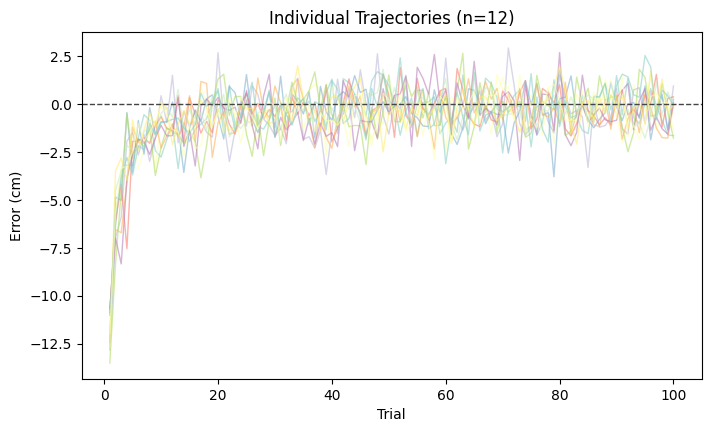

In [8]:
max_traces = 12
subjects_list = trials["subject"].unique()[:max_traces]

fig, ax = plt.subplots(figsize=(8, 4.5))
for subject in subjects_list:
    sub = trials[trials["subject"] == subject]
    ax.plot(sub["trial"], sub["error"], alpha=0.6, lw=1)
ax.axhline(0, color="#444444", lw=1, ls="--")
ax.set_xlabel("Trial")
ax.set_ylabel("Error (cm)")
ax.set_title(f"Individual Trajectories (n={len(subjects_list)})")
plt.show()

## Precision mapping

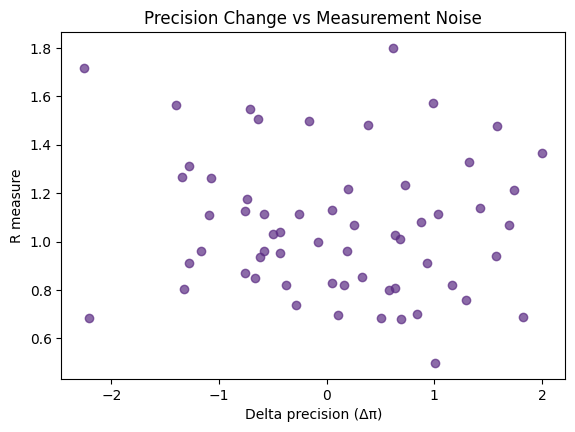

In [9]:
fig, ax = plt.subplots(figsize=(6.5, 4.5))
ax.scatter(subjects["delta_pi"], subjects["r_measure"], alpha=0.7, color="#5b2c83")
ax.set_xlabel("Delta precision (Δπ)")
ax.set_ylabel("R measure")
ax.set_title("Precision Change vs Measurement Noise")
plt.show()